# Baseline solution using Random Forrest

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

# a dictionary of industry sector symbols
group_dictionary = pd.read_csv('data/group_dictionary.csv', sep=';')
column_names_dictionary = pd.read_csv('data/column_names_dictionary.csv', sep=';')
test_data_no_target = pd.read_csv('data/test_data_no_target.csv', sep=';', decimal=',')
training_data = pd.read_csv('data/training_data.csv', sep=';', decimal=',')

display(group_dictionary)
display(column_names_dictionary)
display(test_data_no_target)
display(training_data)

,CODE,NUM,SECTOR
0,G1,1,Financials
1,G2,2,Industrials
2,G3,3,Energy
3,G4,4,Information Technology
4,G5,5,Consumer Staples
5,G6,6,Health Care
6,G7,7,Utilities
7,G8,8,Materials
8,G9,9,Consumer Discretionary
9,G10,10,Real Estate


,CODE,INDEX,INDICATOR NAME
0,Group,1,Industry sector
1,I1,2,"Return on Average Total Assets - %, TTM"
2,I2,3,"Return on Average Common Equity - %, TTM"
3,I3,4,"EBITDA Percentage of Common Equity, TTM"
4,I4,5,"EBITDA Percentage of Total Fixed Assets - Net,..."
...,...,...,...
112,dI54,113,1-year Absolute Change of Total Liabilities Pe...
113,dI55,114,1-year Absolute Change of Long Term Debt Perce...
114,dI56,115,1-year Absolute Change of Book Value Percentag...
115,dI57,116,1-year Absolute Change of Cash Flow from Opera...


,Group,I1,I2,I3,I4,I5,I6,I7,I8,I9,...,dI49,dI50,dI51,dI52,dI53,dI54,dI55,dI56,dI57,dI58
0,G3,0.039284,-0.034382,-0.040373,0.090023,-0.055953,0.049229,0.016236,-0.045865,0.692039,...,-0.377892,-0.410908,-0.417438,-0.220481,0.002526,0.124543,-0.219341,0.148324,0.020379,-0.004969
1,G9,-0.491713,-0.039484,-0.043612,-0.320312,0.065520,-0.216314,-0.366573,-0.052790,-0.370449,...,0.553799,0.660505,0.806000,0.781506,-0.012519,-0.014169,0.669341,0.015033,0.023411,0.007037
2,G7,-0.744979,-0.038271,-0.038631,-0.824021,0.117907,-1.434879,-0.707810,-0.073176,-1.698337,...,0.707252,0.909110,0.738062,-0.024403,0.032079,0.095528,0.350733,-0.149682,0.005134,1.135389
3,G2,0.694507,-0.026038,-0.038985,1.892921,-0.100102,0.022436,-0.198048,-0.050572,0.208738,...,-0.120561,-0.118927,-0.130250,-0.000468,0.002082,0.023541,-0.044464,0.033332,0.079054,-0.002624
4,G2,0.207123,-0.020462,-0.033451,-0.010191,-0.146812,0.235521,0.044640,-0.029062,0.464286,...,-0.672086,-0.679972,-1.136937,-0.789870,0.007839,-0.424394,-0.704341,0.011889,0.936284,-0.015745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,G9,-1.192924,-0.049079,-0.049806,-0.513692,-0.081669,-0.334987,-0.484038,-0.063376,-0.860113,...,0.280022,0.197899,0.425563,0.146857,0.007887,0.144111,0.556732,0.809250,0.040464,-0.000838
1996,G11,0.761006,-0.028790,-0.040586,-0.098537,0.334470,0.177993,0.733065,-0.032186,2.498567,...,-0.140446,NaN,-0.044562,0.508117,0.007100,0.492209,0.634159,-0.389522,0.030106,0.019739
1997,G4,0.663620,-0.014721,-0.035249,2.367521,0.035822,0.437514,0.241244,-0.033637,0.475282,...,-0.562151,-0.694239,-0.974187,0.052026,0.026136,0.287294,-0.278286,-0.283358,-0.005308,0.001944
1998,G1,-0.887896,-0.031149,-0.044787,NaN,3.235044,9.613638,10.032149,0.096885,0.049668,...,NaN,NaN,NaN,NaN,-0.117762,0.038035,-0.140377,-1.110764,NaN,0.000807


,Group,I1,I2,I3,I4,I5,I6,I7,I8,I9,...,dI51,dI52,dI53,dI54,dI55,dI56,dI57,dI58,Class,Perform
0,G9,0.136495,-0.028429,-0.037772,-0.232459,-0.016222,-0.187506,-0.322545,-0.043743,0.125389,...,0.102563,0.188481,-0.016027,-0.135451,-0.189667,0.250967,0.022171,-0.004265,-1,-0.033764
1,G5,-0.714522,-0.042137,-0.052968,-0.796862,-0.018394,0.070102,-0.076321,-0.063864,-1.045521,...,-0.016375,0.020727,-0.006525,-0.018790,-0.098543,0.317744,-0.180502,-0.009215,1,0.127771
2,G10,0.104791,-0.038188,-0.053191,0.620233,0.148587,0.489875,0.319274,-0.060246,0.053174,...,0.272937,0.774169,-0.007144,0.123954,0.000000,-0.110103,0.186669,-0.030720,1,0.183500
3,G2,-0.532847,-0.006582,-0.023377,1.306702,-0.068909,0.048024,-0.119481,-0.021057,-1.012916,...,0.004938,0.018494,-0.003350,-0.029214,0.045747,-0.076884,-0.037859,-0.012046,-1,-0.035668
4,G3,-0.200815,-0.016334,-0.036754,-0.886675,0.484495,-1.148744,0.152517,-0.043580,-0.935537,...,-0.014812,-0.324584,-0.019002,-0.379323,-0.046024,0.282145,0.011008,0.010496,1,0.235055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,G1,-0.946477,-0.039767,-0.051916,NaN,-9.099326,1.470616,1.470374,-0.045827,-1.323460,...,NaN,NaN,-0.015913,0.019281,-0.000427,-0.642472,-4.266003,0.009687,1,0.239101
7996,G7,-0.521183,-0.038272,-0.047929,-0.820632,-0.179414,-0.774646,0.413706,-0.051830,-0.378937,...,-0.168750,0.120571,-0.010506,-0.100286,-0.198928,0.053720,-0.001450,-0.001877,1,0.242938
7997,G2,0.323233,-0.031075,-0.045713,-0.105448,-0.103823,0.153551,-0.052157,-0.056057,-0.163512,...,0.245000,0.079662,-0.009150,-0.191322,-0.083576,0.024407,0.299832,-0.011129,1,0.279085
7998,G4,1.084416,-0.028497,-0.047528,-0.180118,-0.634162,0.143589,-0.033258,-0.058396,0.088713,...,-0.041688,-0.238481,0.006060,-0.016044,NaN,0.209235,-0.165349,0.012005,-1,-0.171056


In [36]:
training_data.isna().sum()

Group        0
I1           0
I2           0
I3           0
I4         525
          ... 
dI56        20
dI57       135
dI58       249
Class        0
Perform      0
Length: 119, dtype: int64

In [37]:
training_data = training_data.dropna()
training_data

,Group,I1,I2,I3,I4,I5,I6,I7,I8,I9,...,dI51,dI52,dI53,dI54,dI55,dI56,dI57,dI58,Class,Perform
0,G9,0.136495,-0.028429,-0.037772,-0.232459,-0.016222,-0.187506,-0.322545,-0.043743,0.125389,...,0.102563,0.188481,-0.016027,-0.135451,-0.189667,0.250967,0.022171,-0.004265,-1,-0.033764
1,G5,-0.714522,-0.042137,-0.052968,-0.796862,-0.018394,0.070102,-0.076321,-0.063864,-1.045521,...,-0.016375,0.020727,-0.006525,-0.018790,-0.098543,0.317744,-0.180502,-0.009215,1,0.127771
4,G3,-0.200815,-0.016334,-0.036754,-0.886675,0.484495,-1.148744,0.152517,-0.043580,-0.935537,...,-0.014812,-0.324584,-0.019002,-0.379323,-0.046024,0.282145,0.011008,0.010496,1,0.235055
5,G8,0.412335,-0.017345,0.000320,-0.172803,0.347920,0.653547,0.666238,0.017413,1.650159,...,0.346750,0.480494,-0.032602,-0.115915,-0.205738,-0.520875,0.215337,-0.004419,1,0.295635
6,G2,1.940864,-0.015633,-0.031934,0.978646,-0.143657,-0.060827,-0.207654,-0.039914,1.595729,...,-0.147437,-0.074558,-0.001843,-0.099887,-0.131061,0.066714,0.030109,-0.015794,1,0.215978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7991,G4,1.739542,-0.013802,-0.035086,6.007093,-0.138919,0.228338,0.041948,-0.041081,1.104254,...,1.146187,0.953494,0.011397,0.111294,1.375105,-0.688390,-0.511105,0.071006,1,0.043511
7993,G7,-0.657430,-0.036952,-0.043255,-0.851536,-0.075877,-0.685491,0.488260,-0.051446,-0.828768,...,0.170125,0.223013,0.009767,0.059889,0.098167,-0.098310,-0.001902,0.004391,1,0.050864
7994,G6,1.001966,-0.018646,-0.033426,1.082424,-0.100728,0.801347,0.658979,-0.028286,1.661510,...,0.724250,2.094649,-0.039768,-0.344559,0.035517,0.340169,-0.150080,-0.002994,1,0.213191
7996,G7,-0.521183,-0.038272,-0.047929,-0.820632,-0.179414,-0.774646,0.413706,-0.051830,-0.378937,...,-0.168750,0.120571,-0.010506,-0.100286,-0.198928,0.053720,-0.001450,-0.001877,1,0.242938


# Exploratory Data Analysis

<Axes: >

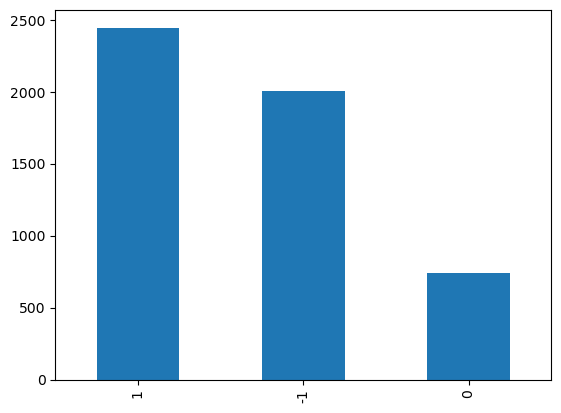

In [38]:
training_data['Class'].value_counts().plot(kind='bar')

In [39]:
training_data.describe()

,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,...,dI51,dI52,dI53,dI54,dI55,dI56,dI57,dI58,Class,Perform
count,5194.000000,5194.000000,5194.000000,5194.000000,5194.000000,5194.000000,5194.000000,5194.000000,5194.000000,5194.000000,...,5194.000000,5194.000000,5194.000000,5194.000000,5194.000000,5194.000000,5194.000000,5194.000000,5194.000000,5194.000000
mean,0.168343,-0.016268,-0.024936,-0.028077,-0.064198,-0.099035,-0.093122,-0.029420,0.050499,-0.009640,...,-0.038044,-0.005017,0.010706,0.004268,0.015731,0.007807,0.000121,0.002658,0.085291,0.033839
std,0.858950,0.071742,0.076997,0.889830,0.324230,0.360558,0.351534,0.093200,0.894357,0.068902,...,0.394382,0.625021,0.546722,0.274144,0.404214,0.378490,0.148010,0.243314,0.922076,0.146806
min,-2.432857,-0.076729,-0.059852,-0.978840,-5.288669,-6.895184,-0.772962,-0.075850,-1.833923,-0.221932,...,-3.651750,-11.712831,-16.070787,-1.764957,-1.871519,-2.933452,-2.682221,-7.577418,-1.000000,-0.517174
25%,-0.452727,-0.035799,-0.044183,-0.554019,-0.183999,-0.278850,-0.343988,-0.052973,-0.591989,-0.031546,...,-0.196484,-0.111666,-0.012611,-0.130385,-0.192865,-0.136088,-0.027914,-0.006516,-1.000000,-0.068329
50%,-0.015574,-0.028015,-0.037617,-0.257797,-0.087053,-0.107502,-0.160155,-0.044861,-0.118363,-0.020340,...,-0.018781,-0.003695,0.000459,-0.001842,-0.024268,-0.019209,-0.000108,0.001100,0.000000,0.027499
75%,0.559465,-0.016067,-0.026185,0.243698,0.042045,0.082107,0.120302,-0.028395,0.491419,-0.004791,...,0.148297,0.091740,0.014137,0.119505,0.177877,0.114340,0.028756,0.009045,1.000000,0.135043
max,5.013767,2.024282,1.998512,8.868784,7.694455,1.795039,1.835375,2.397643,5.579740,1.627671,...,2.407875,8.015532,28.167454,2.858523,3.097674,4.718076,3.662713,7.581309,1.000000,0.633123


In [62]:
# Create a mapping dictionary from the 'CODE' to 'NUM'
sector_mapping = {
    'G1': 1, 'G2': 2, 'G3': 3, 'G4': 4,
    'G5': 5, 'G6': 6, 'G7': 7, 'G8': 8,
    'G9': 9, 'G10': 10, 'G11': 11
}

training_data['Group'] = training_data['Group'].map(sector_mapping)


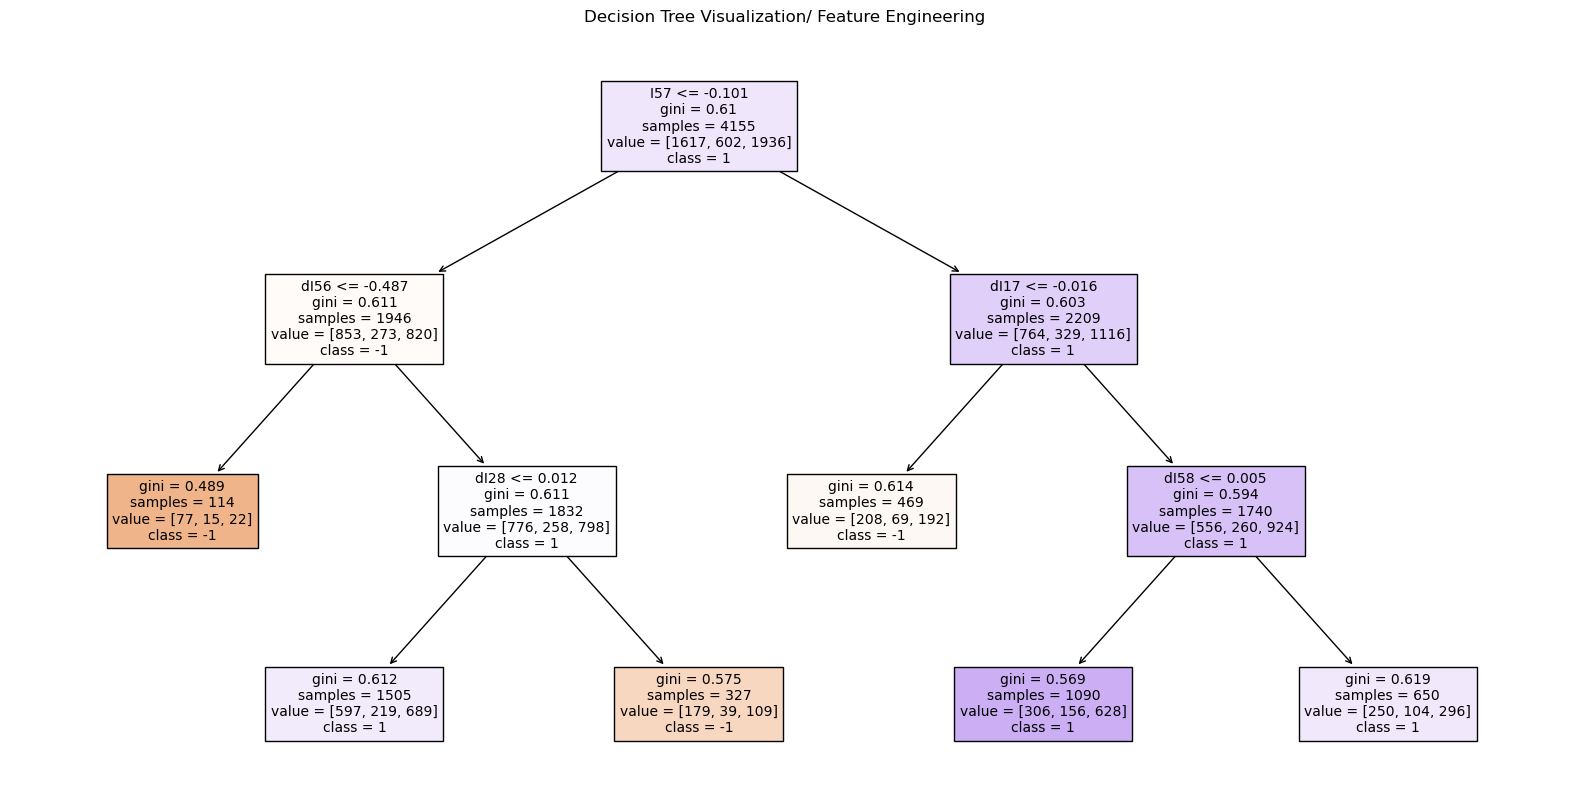

In [44]:
# Splitting the dataset into features and target variable
X = training_data.drop(columns=['Class','Perform'])  
y = training_data['Class']

# Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(min_impurity_decrease=0.002, random_state=42)


clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10))

feature_names_list = list(X_train.columns)
class_names_list = ['-1', '0', '1']
plot_tree(clf, feature_names=feature_names_list, class_names=class_names_list, filled=True, fontsize=10)
plt.title('Decision Tree Visualization/ Feature Engineering')
plt.show()



# Training a Random Forest classifier

              precision    recall  f1-score   support

          -1       0.43      0.43      0.43       388
           0       0.09      0.01      0.01       139
           1       0.50      0.63      0.56       512

    accuracy                           0.47      1039
   macro avg       0.34      0.35      0.33      1039
weighted avg       0.42      0.47      0.44      1039

Accuracy: 0.4706448508180943
    Feature  Importance
57      I57    0.011338
116    dI58    0.011326
5        I5    0.011182
86     dI28    0.010546
105    dI47    0.010374
90     dI32    0.010296
112    dI54    0.010267
110    dI52    0.010154
63      dI5    0.010010
113    dI55    0.009967


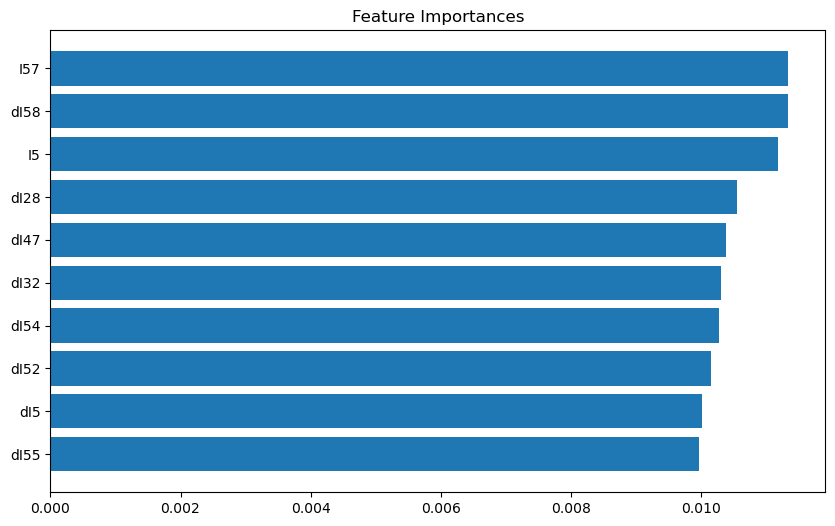

In [11]:
X = training_data.drop(columns=['Class','Perform'])
y = training_data['Class']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100,class_weight='balanced', random_state=42)  # n_estimators can be adjusted

# Train the model
rf_clf.fit(X_train, y_train)
# Make predictions
y_pred = rf_clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
# Get feature importances
importances = rf_clf.feature_importances_

# Summarize feature importances in a DataFrame
features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
features_df = features_df.sort_values(by='Importance', ascending=False)
print(features_df.head(10))  # Display top 10 features


plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(features_df['Feature'][:10], features_df['Importance'][:10])
plt.gca().invert_yaxis()
plt.show()



## Hyperparameter tunning and Cross Validation

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report


In [73]:
# Parameters grid to search
param_grid = {
    'n_estimators': [100],  # Focus on a standard number of trees
    'max_depth': [None, 10],  # Only two options, unlimited or moderately deep
    'min_samples_split': [2],  # Keep the default split
    'min_samples_leaf': [1]   # Keep the default leaf size
}

# Setup the grid search
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,  # Number of folds in cross-validation
    scoring='accuracy',  # Can be changed according to what metric you want to prioritize
    verbose=1  # Controls the verbosity: the higher, the more messages
)
# Fitting grid search
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))



Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.47


In [63]:
# Create a mapping dictionary from the 'CODE' to 'NUM'
sector_mapping = {
    'G1': 1, 'G2': 2, 'G3': 3, 'G4': 4,
    'G5': 5, 'G6': 6, 'G7': 7, 'G8': 8,
    'G9': 9, 'G10': 10, 'G11': 11
}

test_data_no_target['Group'] = test_data_no_target['Group'].map(sector_mapping)


In [64]:
test_data_no_target

,Group,I1,I2,I3,I4,I5,I6,I7,I8,I9,...,dI49,dI50,dI51,dI52,dI53,dI54,dI55,dI56,dI57,dI58
0,3,0.039284,-0.034382,-0.040373,0.090023,-0.055953,0.049229,0.016236,-0.045865,0.692039,...,-0.377892,-0.410908,-0.417438,-0.220481,0.002526,0.124543,-0.219341,0.148324,0.020379,-0.004969
1,9,-0.491713,-0.039484,-0.043612,-0.320312,0.065520,-0.216314,-0.366573,-0.052790,-0.370449,...,0.553799,0.660505,0.806000,0.781506,-0.012519,-0.014169,0.669341,0.015033,0.023411,0.007037
2,7,-0.744979,-0.038271,-0.038631,-0.824021,0.117907,-1.434879,-0.707810,-0.073176,-1.698337,...,0.707252,0.909110,0.738062,-0.024403,0.032079,0.095528,0.350733,-0.149682,0.005134,1.135389
3,2,0.694507,-0.026038,-0.038985,1.892921,-0.100102,0.022436,-0.198048,-0.050572,0.208738,...,-0.120561,-0.118927,-0.130250,-0.000468,0.002082,0.023541,-0.044464,0.033332,0.079054,-0.002624
4,2,0.207123,-0.020462,-0.033451,-0.010191,-0.146812,0.235521,0.044640,-0.029062,0.464286,...,-0.672086,-0.679972,-1.136937,-0.789870,0.007839,-0.424394,-0.704341,0.011889,0.936284,-0.015745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,9,-1.192924,-0.049079,-0.049806,-0.513692,-0.081669,-0.334987,-0.484038,-0.063376,-0.860113,...,0.280022,0.197899,0.425563,0.146857,0.007887,0.144111,0.556732,0.809250,0.040464,-0.000838
1996,11,0.761006,-0.028790,-0.040586,-0.098537,0.334470,0.177993,0.733065,-0.032186,2.498567,...,-0.140446,NaN,-0.044562,0.508117,0.007100,0.492209,0.634159,-0.389522,0.030106,0.019739
1997,4,0.663620,-0.014721,-0.035249,2.367521,0.035822,0.437514,0.241244,-0.033637,0.475282,...,-0.562151,-0.694239,-0.974187,0.052026,0.026136,0.287294,-0.278286,-0.283358,-0.005308,0.001944
1998,1,-0.887896,-0.031149,-0.044787,NaN,3.235044,9.613638,10.032149,0.096885,0.049668,...,NaN,NaN,NaN,NaN,-0.117762,0.038035,-0.140377,-1.110764,NaN,0.000807


In [65]:
test_data_no_target.isna().sum()

Group      0
I1         0
I2         0
I3         0
I4       119
        ... 
dI54       0
dI55      46
dI56       9
dI57      34
dI58      67
Length: 117, dtype: int64

In [69]:
test_data_no_target=test_data_no_target.fillna(0)

In [72]:
sub = best_model.predict(test_data_no_target)

In [73]:
len(sub)

2000

In [74]:
# Path to save the submission file
submission_file_path = 'submission.txt'

# Open the file in write mode
with open(submission_file_path, 'w') as f:
    # Iterate over each prediction and write it to the file
    for prediction in sub:
        f.write(f"{prediction}\n")  # Writing each prediction on a new line

print("Submission file created:", submission_file_path)

Submission file created: submission.txt


In [76]:
importances = best_model.feature_importances_
features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(features_df.head(10))


    Feature  Importance
57      I57    0.014053
83     dI25    0.013681
116    dI58    0.013145
86     dI28    0.012323
110    dI52    0.012133
105    dI47    0.012055
101    dI43    0.011324
81     dI23    0.011309
114    dI56    0.011254
75     dI17    0.010827


Lemme see the class imbalace 

In [12]:
class_distribution = y.value_counts()
print(class_distribution)


 1    2448
-1    2005
 0     741
Name: Class, dtype: int64


# Implementing Smote Algorithm

In [ ]:
pip install imbalanced-learn

After SMOTE, counts of label '1': 1936
After SMOTE, counts of label '-1': 1936
After SMOTE, counts of label '0': 1936
              precision    recall  f1-score   support

          -1       0.41      0.49      0.45       388
           0       0.19      0.16      0.17       139
           1       0.52      0.48      0.50       512

    accuracy                           0.44      1039
   macro avg       0.38      0.37      0.37      1039
weighted avg       0.44      0.44      0.44      1039

Accuracy: 0.43888354186718
    Feature  Importance
57      I57    0.011554
110    dI52    0.011281
105    dI47    0.010561
116    dI58    0.010484
106    dI48    0.010383
115    dI57    0.010329
109    dI51    0.010256
102    dI44    0.010007
63      dI5    0.009966
112    dI54    0.009941


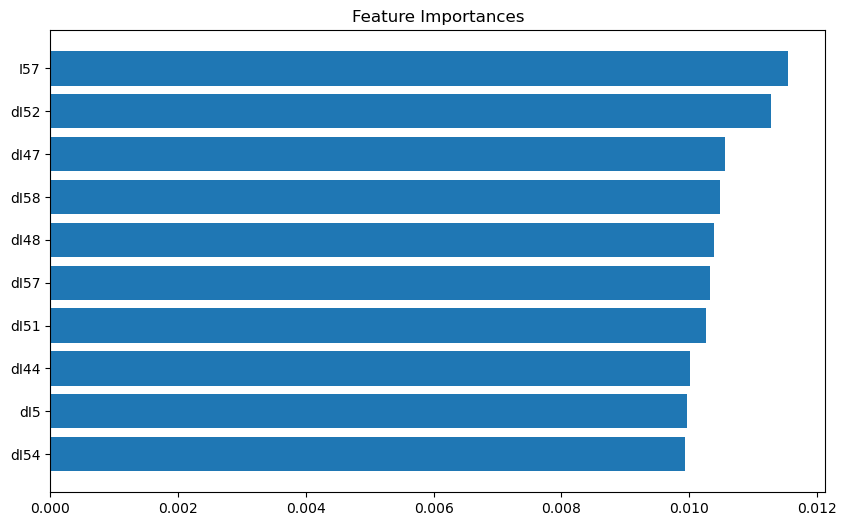

In [13]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is already loaded and the 'Group' column mapped
X = training_data.drop(columns=['Class', 'Perform'])  # Assuming 'Class' is the target
y = training_data['Class']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("After SMOTE, counts of label '1': {}".format(sum(y_train_smote == 1)))
print("After SMOTE, counts of label '-1': {}".format(sum(y_train_smote == -1)))
print("After SMOTE, counts of label '0': {}".format(sum(y_train_smote == 0)))

# Initialize the RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)  # n_estimators can be adjusted

# Train the model using the SMOTE-resampled training data
rf_clf.fit(X_train_smote, y_train_smote)

# Make predictions on the original (not resampled) test set
y_pred = rf_clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Get feature importances
importances = rf_clf.feature_importances_

# Summarize feature importances in a DataFrame
features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
features_df = features_df.sort_values(by='Importance', ascending=False)
print(features_df.head(10))  # Display top 10 features

# Optionally, plot feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(features_df['Feature'][:10], features_df['Importance'][:10])
plt.gca().invert_yaxis()  # Invert y-axis to have the most important at the top
plt.show()


# Hyperparameter tunning 

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100],  # Standard number of trees
    'max_depth': [None, 10],  # Options for tree depth
    'min_samples_split': [2],  # Default split
    'min_samples_leaf': [1]   # Default leaf size
}

# Initialize the GridSearchCV object with F1-score scoring
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='f1_weighted',  # Use weighted F1-score
    verbose=1
)

# Fit the grid search to the data
grid_search.fit(X_train_smote, y_train_smote)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best F1-score:", grid_search.best_score_)


Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best F1-score: 0.6216649686118859


In [33]:
# Get the best model from grid search
best_model = grid_search.best_estimator_

# Predict on the test data
test_predictions = best_model.predict(test_data)


NameError: name 'test_data' is not defined

In [30]:
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline as IMBPipeline

# Create a pipeline that includes SMOTE and the classifier
pipeline = IMBPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Perform cross-validation
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1_weighted')

# Print cross-validation results
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())


Cross-validation scores: [0.42912518 0.44133665 0.410616   0.4468849  0.42169804]
Mean cross-validation score: 0.42993215602707496


In [31]:
from sklearn.feature_selection import SelectFromModel

# Feature selector that removes all low-importance features
selector = SelectFromModel(rf_clf, threshold='median')
X_train_selected = selector.fit_transform(X_train_smote, y_train_smote)
X_test_selected = selector.transform(X_test)

# Train a new model on the selected features
rf_clf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf_selected.fit(X_train_selected, y_train_smote)

# Evaluate the new model
y_pred_selected = rf_clf_selected.predict(X_test_selected)
print(classification_report(y_test, y_pred_selected))


              precision    recall  f1-score   support

          -1       0.40      0.46      0.43       388
           0       0.16      0.15      0.16       139
           1       0.52      0.47      0.49       512

    accuracy                           0.42      1039
   macro avg       0.36      0.36      0.36      1039
weighted avg       0.43      0.42      0.42      1039



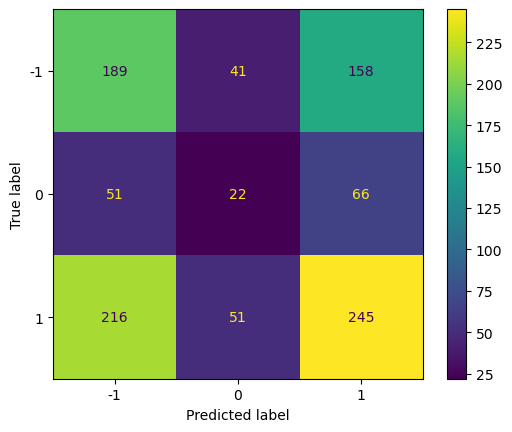

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_clf.classes_)
disp.plot()
plt.show()
